In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("marketing.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
## lets check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
## lets check missing values in the dataset
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [5]:
# Filling the missing value in the income my mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

## Lets recheck the missing values
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [6]:
## Check duplicated records in the dataset
len(df[df.duplicated()])

0

In [7]:
## dropping redundant columns
df = df.drop(columns=['ID','Dt_Customer'],axis=1)

In [8]:
# Checking number of unique categories present in the "Marital_Status"
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [9]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [11]:
## recheck after grouping the categories.
df['Marital_Status'].value_counts()

Marital_Status
relationship    1444
Single           796
Name: count, dtype: int64

In [12]:
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


In [13]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [14]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

In [15]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [16]:
# Dropping the columns, since we have grouped them

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,0,422,19,1,0


In [17]:
# Adding a column "Age" in the dataframe
df['Age'] = 2022 - df["Year_Birth"]

In [18]:
df.drop('Year_Birth',axis=1,inplace=True)

In [19]:
df.head(2)

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,Graduation,Single,58138.0,58,0,1617,25,0,1,65
1,Graduation,Single,46344.0,38,0,27,6,2,0,68


In [20]:
dfc = df.copy()

In [21]:
## Label Encoding
cate=['Education', 'Marital_Status']
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [22]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,2,0,58138.0,58,0,1617,25,0,1,65
1,2,0,46344.0,38,0,27,6,2,0,68
2,2,1,71613.0,26,0,776,21,0,0,57
3,2,1,26646.0,26,0,53,8,1,0,38
4,4,1,58293.0,94,0,422,19,1,0,41


In [23]:
## Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [24]:
scaled_features_df.head(3)

,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age
0,-0.350141,-1.346874,0.235327,0.307039,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-0.350141,-1.346874,-0.235826,-0.383664,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.350141,0.742460,0.773633,-0.798086,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643


In [25]:
## step1: Calculate the covariance matrix.
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663, -0.01375403,  0.1200273 , -0.01173369, -0.05056252,
         0.09209518,  0.09405439,  0.05321304,  0.06327892,  0.17146685],
       [-0.01375403,  1.00044663,  0.00463847, -0.00450972, -0.00520466,
        -0.01775232,  0.00671037,  0.03917598, -0.06004206, -0.0042384 ],
       [ 0.1200273 ,  0.00463847,  1.00044663, -0.00394826, -0.02723528,
         0.66500337,  0.5636214 , -0.29084155,  0.28717443,  0.16101378],
       [-0.01173369, -0.00450972, -0.00394826,  1.00044663,  0.01323699,
         0.02044173,  0.00574294,  0.01806145, -0.08900203,  0.01987996],
       [-0.05056252, -0.00520466, -0.02723528,  0.01323699,  1.00044663,
        -0.03707503, -0.02059185,  0.03108014, -0.01761676,  0.030141  ],
       [ 0.09209518, -0.01775232,  0.66500337,  0.02044173, -0.03707503,
         1.00044663,  0.75423984, -0.49911047,  0.4564099 ,  0.11135611],
       [ 0.09405439,  0.00671037,  0.5636214 ,  0.00574294, -0.02059185,
         0.75423984,  1.00044663, -0.24589955

In [26]:
## step2: Calculate the eigen values and eigen vectors.
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [2.82825422 0.16268189 1.25671692 0.44642558 0.68852169 0.72014579
 0.83831416 1.05133456 0.99672837 1.0153431 ]


eigein vectors 
 [[ 9.68616360e-02 -1.14040238e-02 -5.42962436e-01 -4.78349449e-02
   5.74039740e-02  2.94125705e-01 -6.71991659e-01 -3.76199725e-01
   1.00941783e-01 -1.72617973e-02]
 [-2.11998107e-02 -6.97613253e-04 -7.79504963e-02 -8.07214688e-03
   1.10415084e-01 -1.19602921e-01 -2.14712105e-01  2.64491403e-01
  -4.20392056e-01  8.21051656e-01]
 [ 4.70545377e-01 -1.73616866e-01 -1.09418121e-01  8.07252800e-01
  -2.16588775e-01  1.40590207e-01  9.96061082e-02  7.18687002e-02
  -2.41932967e-02  4.96660628e-02]
 [-1.22664315e-02 -3.96044078e-02 -1.24037867e-01  1.76593781e-02
   2.23098213e-02 -2.08718955e-01 -2.79156905e-01  6.82882884e-01
   6.27676007e-01 -1.69607942e-02]
 [-3.33407565e-02  5.96533459e-03 -2.55578632e-02  2.01432755e-03
  -1.40338324e-02  1.06301760e-01 -2.85416902e-01  4.74828140e-01
  -6.27515907e-01 -5.34787575e-01]
 [ 5.54145758e-01 

In [27]:
## step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Explained Variance:  [28.26991605813608, 12.5615588810242, 10.50865212261789, 10.148898225632221, 9.962833994455522, 8.379399168715384, 7.1982429408136275, 6.882143140591923, 4.462262869565124, 1.626092598448035]
Cummulative Variance Explained:  [ 28.26991606  40.83147494  51.34012706  61.48902529  71.45185928
  79.83125845  87.02950139  93.91164453  98.3739074  100.        ]


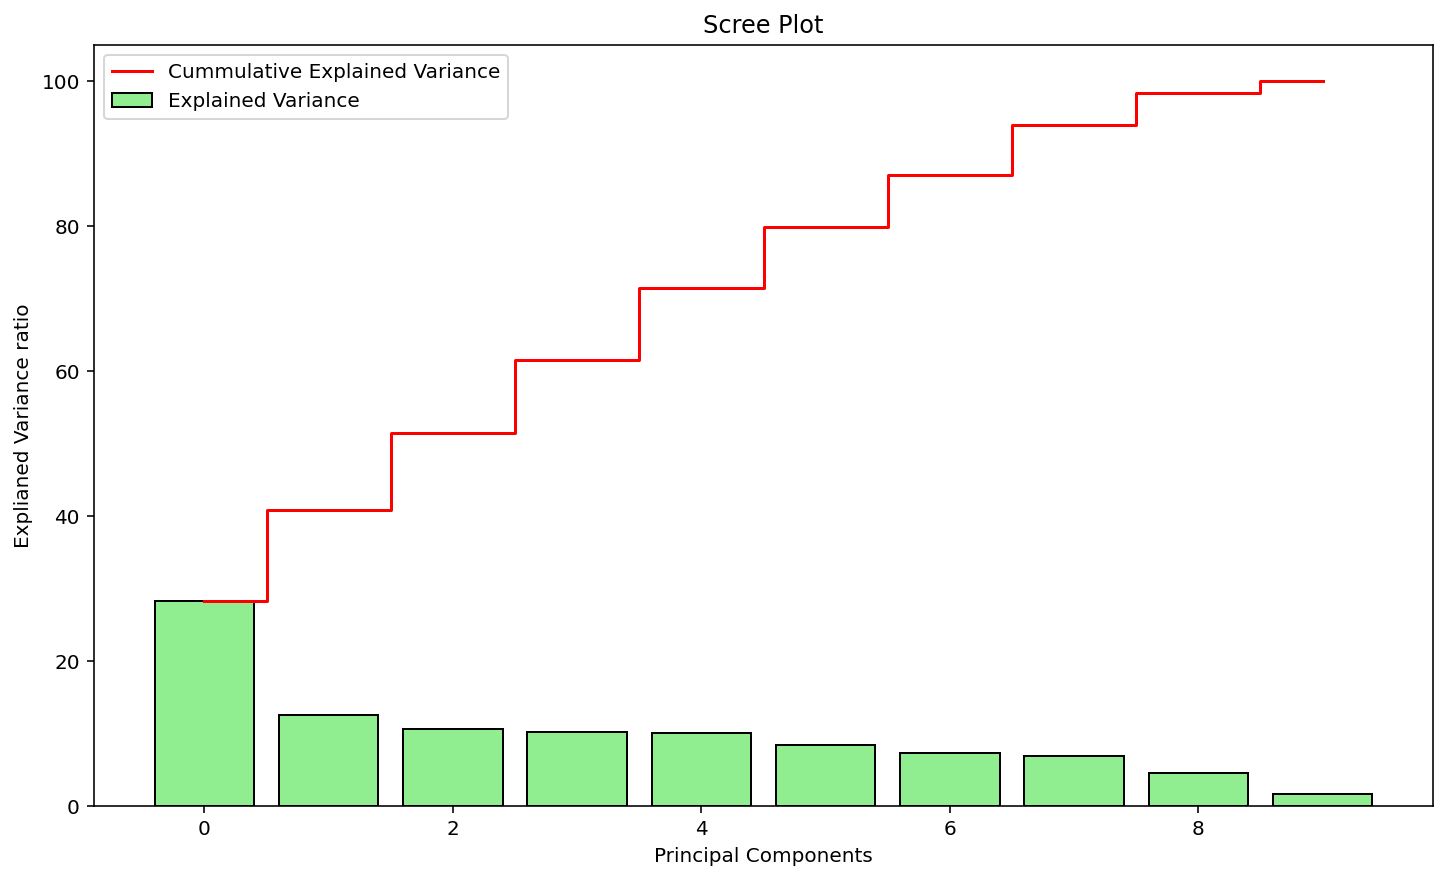

In [28]:
## Scree plot.
plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explianed Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

In [29]:
## Using the dimensions obtainted from the PCA to apply clustering.(i.e, 8)
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.400155,-0.158359,0.173616,1.144961,-0.710607,0.848982,0.096911,-0.662632
1,-1.685353,1.035254,-0.631526,1.211321,-0.192947,1.249851,0.506366,0.066299
2,1.153913,-0.282523,0.102553,-0.793783,0.714669,0.729036,-0.902543,-0.673988
3,-1.783079,-1.119112,-0.444958,-0.785361,0.587718,-0.323594,-0.389894,0.057251
4,0.010566,0.590941,0.817011,-0.838955,-0.982988,-1.680099,-0.762159,0.594821


In [30]:
## finding optimal K value by KMeans clustering using Elbow plot.
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

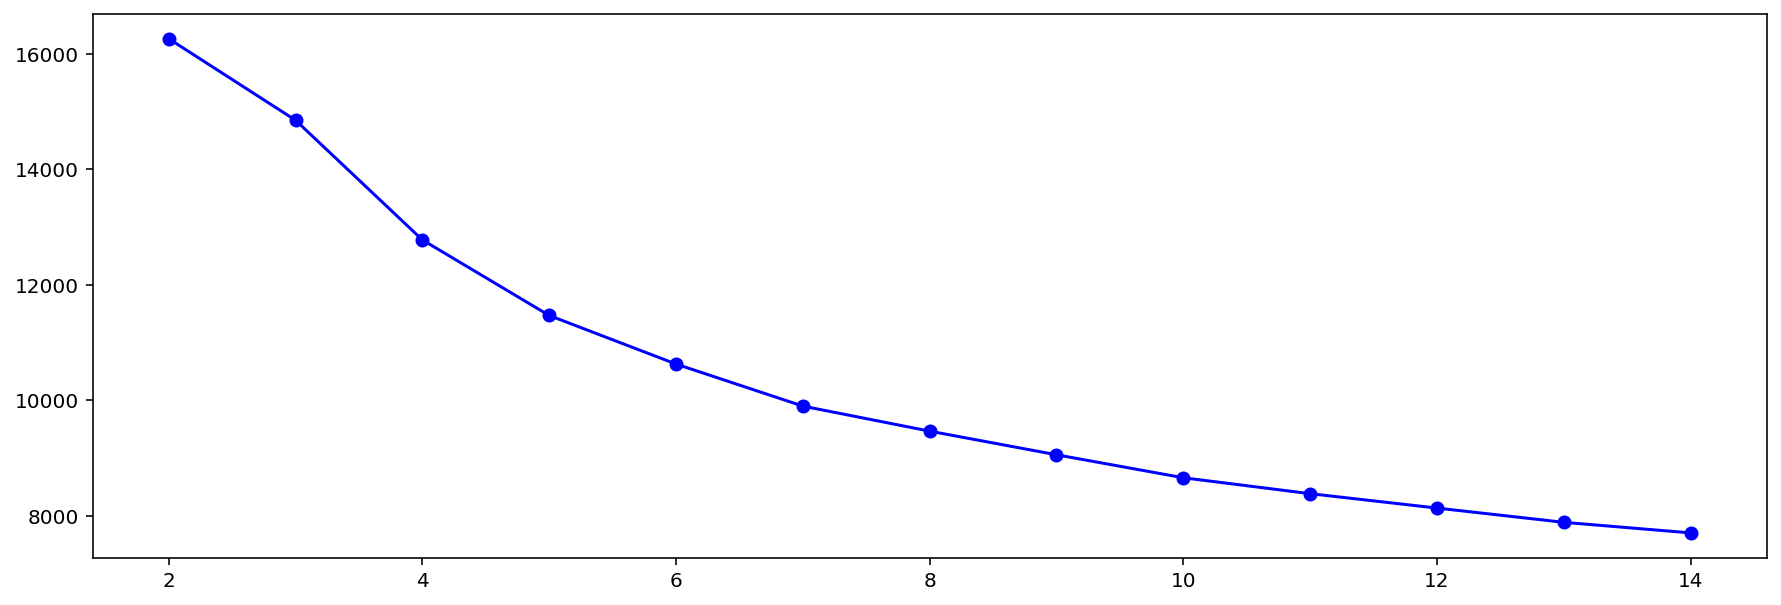

In [31]:
## creataing a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

## Elbow plot.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [32]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [33]:
## creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [34]:
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.400155,-0.158359,0.173616,1.144961,-0.710607,0.848982,0.096911,-0.662632,1
1,-1.685353,1.035254,-0.631526,1.211321,-0.192947,1.249851,0.506366,0.066299,2
2,1.153913,-0.282523,0.102553,-0.793783,0.714669,0.729036,-0.902543,-0.673988,1
3,-1.783079,-1.119112,-0.444958,-0.785361,0.587718,-0.323594,-0.389894,0.057251,2
4,0.010566,0.590941,0.817011,-0.838955,-0.982988,-1.680099,-0.762159,0.594821,1


In [35]:
kmeans_df['Label'].value_counts()

Label
2    1147
1     856
0     237
Name: count, dtype: int64

In [48]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = load_digits().data

#Transform the data
df = pca.fit_transform(data)
df.shape

(1797, 2)

In [42]:
scaler = StandardScaler()
 
scaler.fit(df)
 
Bcancer_scaled = scaler.transform(df)

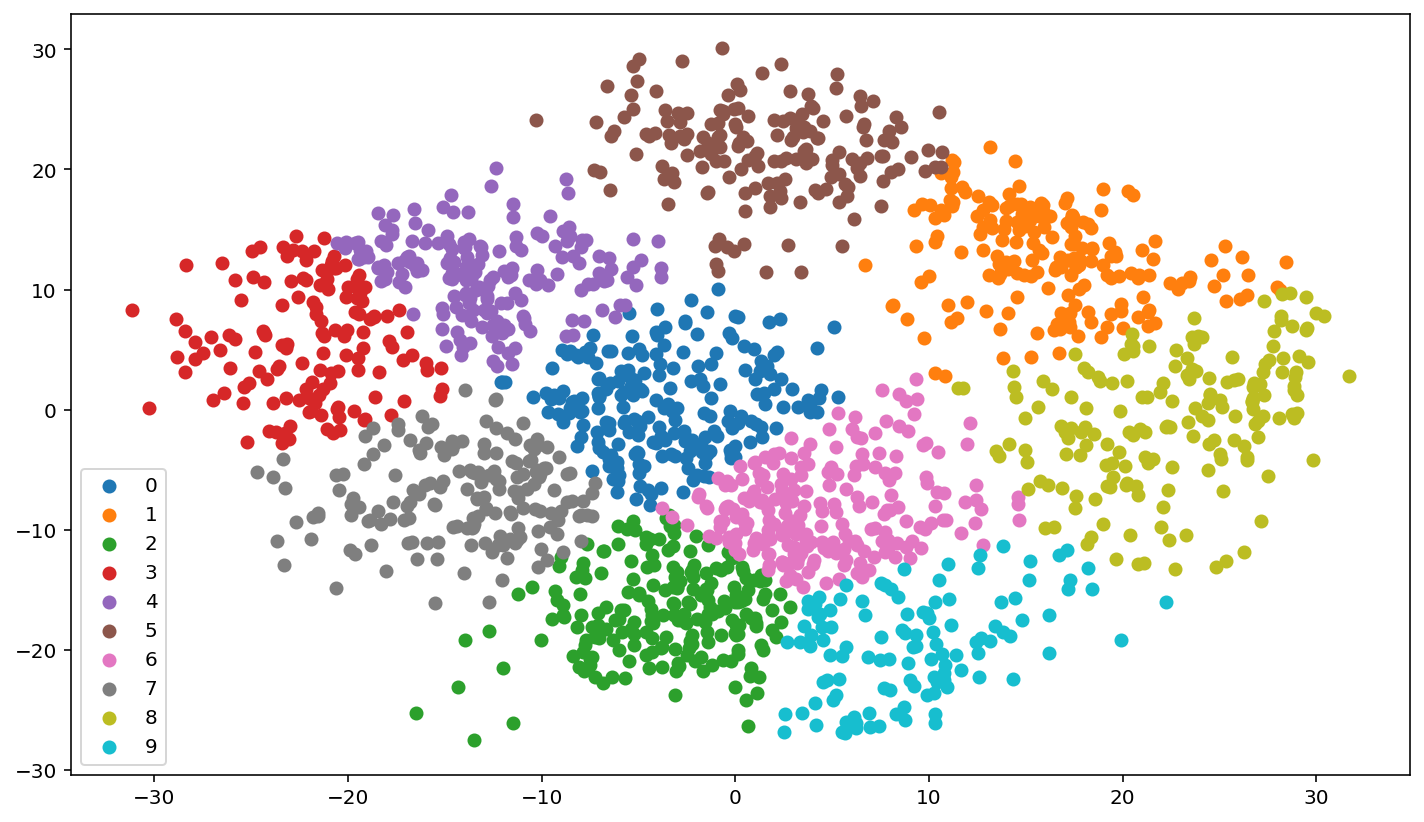

In [52]:
#Load Data
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

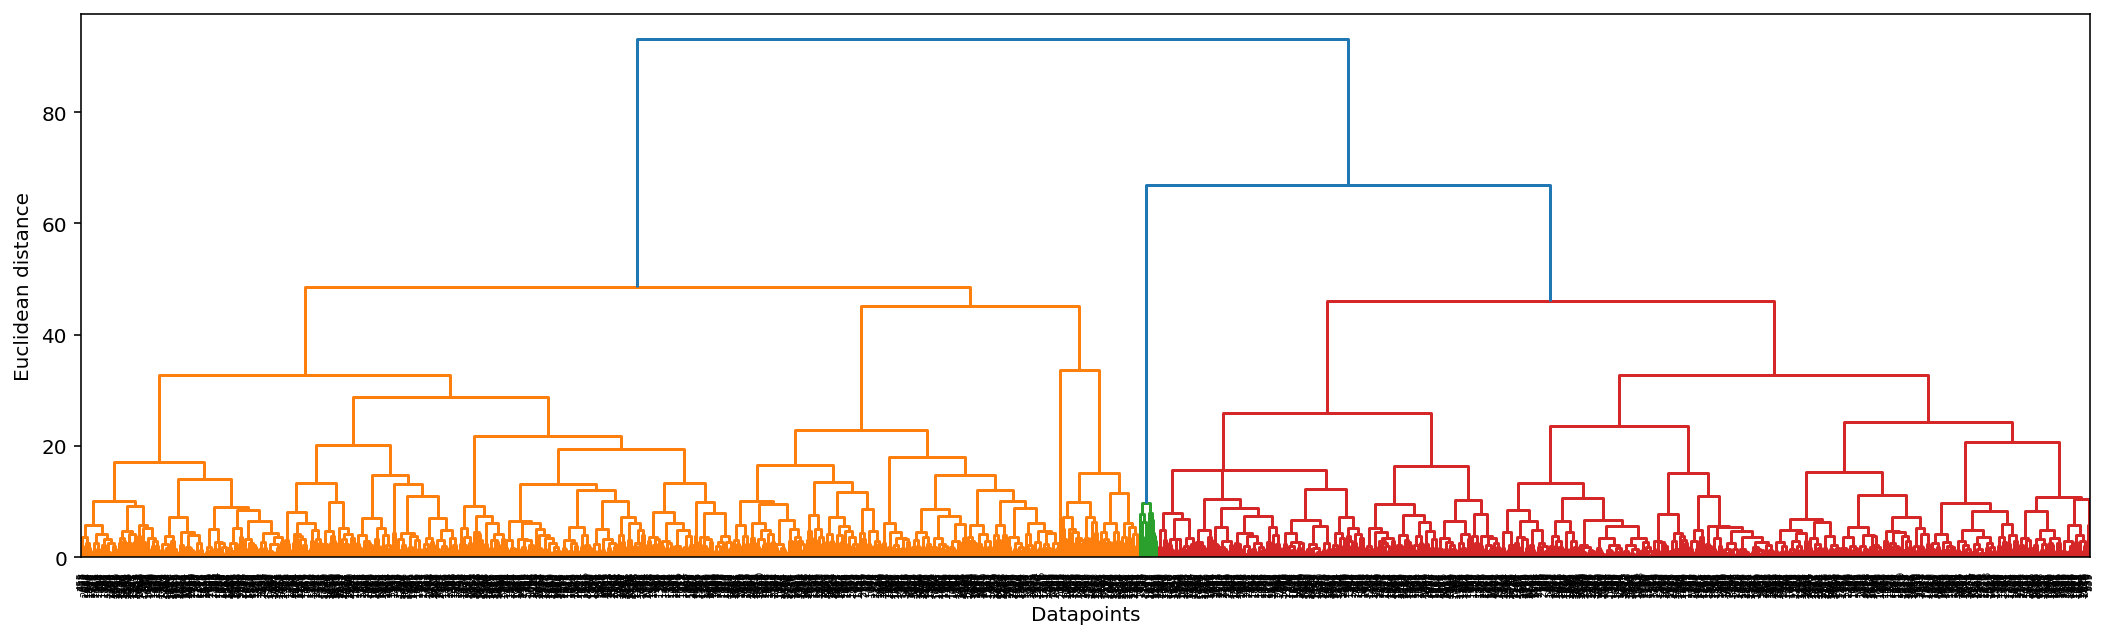

In [54]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.1953269278987601


3 0.20313571826900448


4 0.17395958717234267


5 0.14508245902819655


6 0.1553784680322984


7 0.1552619383470093


8 0.12893536402180128


9 0.11723007378493817


10 0.11995018104860722


11 0.1182900137805396


12 0.12042291646023351


13 0.11544079815492278


14 0.11642326253333647


In [57]:
## Building hierarchical clustering model using the optimal clusters as 3 using original data
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [58]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [66]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)

df_hier= dfc.join(df_label1)
df_hier.head()


,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,NumTotalPurchases,Kids,TotalAcceptedCmp,Age,Labels
0,Graduation,Single,58138.0,58,0,1617,25,0,1,65,0
1,Graduation,Single,46344.0,38,0,27,6,2,0,68,1
2,Graduation,relationship,71613.0,26,0,776,21,0,0,57,0
3,Graduation,relationship,26646.0,26,0,53,8,1,0,38,1
4,PhD,relationship,58293.0,94,0,422,19,1,0,41,0


In [81]:
# Create a Simple Bar Plot in Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('marketing.csv')
sns.barplot(data=marketing.csv, x='Labels', y='Total Expenses')
plt.show()



 


URLError: <urlopen error [Errno 110] Connection timed out>

In [0]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()


In [0]:
sns.countplot(df_hier['Marital_Status'],hue='Labels',data=df_hier)
plt.show()

In [0]:
sns.barplot(df_hier['Labels'],df_hier['NumTotalPurchases'])
plt.show()